# Analysis of Predictors for Housing Prices
### Lynn Anderson

## Business Understanding

A rental company in Ames, IA has acquired some houses in several neighborhoods. They are looking to renovate the homes before renting them out, and would like to know how they can increase the value of the homes. I am going to identify two features that influence the prices of homes in the area, and make recommendations on what the company should prioritize when remodeling their houses. 

# Data Preparation

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
import scipy.stats as stats

In [2]:
# load and investigate data
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [5]:
# check for null values
df.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

Heat source and Sewer system contain null values. Because the null values represent less than 0.1% of the data set, I am going to drop them. 

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
dtype: int64

In [8]:
#check for duplicates
df.duplicated().sum()

1

In [9]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30110 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30110 non-null  int64  
 1   date           30110 non-null  object 
 2   price          30110 non-null  float64
 3   bedrooms       30110 non-null  int64  
 4   bathrooms      30110 non-null  float64
 5   sqft_living    30110 non-null  int64  
 6   sqft_lot       30110 non-null  int64  
 7   floors         30110 non-null  float64
 8   waterfront     30110 non-null  object 
 9   greenbelt      30110 non-null  object 
 10  nuisance       30110 non-null  object 
 11  view           30110 non-null  object 
 12  condition      30110 non-null  object 
 13  grade          30110 non-null  object 
 14  heat_source    30110 non-null  object 
 15  sewer_system   30110 non-null  object 
 16  sqft_above     30110 non-null  int64  
 17  sqft_basement  30110 non-null  int64  
 18  sqft_g

The dataset now contains 30,110 records

In [12]:
# Examine the towns. This may be interesting to look at later
df['city'] = df['address'].str.split().apply(lambda x: x[-5])
df['city'].value_counts().head(10)

Seattle,      9367
Renton,       1943
Kent,         1583
Bellevue,     1528
Auburn,       1511
Kirkland,     1269
Way,          1167
Redmond,       985
Sammamish,     976
Valley,        887
Name: city, dtype: int64

In [13]:
df['city'].unique()

array(['Renton,', 'Seattle,', 'Issaquah,', 'Shoreline,', 'Burien,',
       'Kent,', 'Way,', 'Duvall,', 'Omaha,', 'Auburn,', 'Bellevue,',
       'Valley,', 'Woodinville,', 'Redmond,', 'Medina,', 'Park,',
       'SeaTac,', 'Hill,', 'Bend,', 'Bothell,', 'Kirkland,', 'New',
       'Moines,', 'McLeansboro,', 'Newcastle,', 'Island,', 'Carnation,',
       'Sammamish,', 'Snoqualmie,', 'Enumclaw,', 'Covington,', 'City,',
       'Rapids,', 'Scituate,', 'Longmont,', 'Hills,', 'Philadelphia,',
       'Algona,', 'Kenmore,', 'Minneapolis,', 'Tukwila,', 'Diamond,',
       'Prairie,', 'Pacific,', 'Homestead,', 'Portland,', 'Vashon,',
       'Cucamonga,', 'North', 'Plattsmouth,', 'Springfield,', 'Columbus,',
       'Rockford,', 'Honolulu,', 'Harrison,', 'Point,', 'Flint,',
       'Rochester,', 'Ravensdale,', 'Leadwood,', 'Desloge,', 'Dilworth,',
       'Arts,', 'Liberty,', 'Golden,', 'Preston,', 'Brooksville,',
       'Rhode', 'Gilbert,', 'Skykomish,', 'Haven,', 'George,',
       'Continental,', 'South

In [14]:
df['city'].nunique()

241

241 cities are represented in this dataset.

## Exploratory Data Analysis 
Find variables most correlated with price, and check for variables highly correlated with each other.

In [16]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
id,1.000000,-0.034035,-0.007081,-0.012312,-0.028181,-0.119284,0.031972,-0.023307,-0.015016,-0.008022,-0.041633,0.023130,-0.028867,-0.000754,0.000632
price,-0.034035,1.000000,0.288992,0.480284,0.608586,0.086562,0.180555,0.538614,0.244938,0.263655,0.313787,0.095728,0.085039,0.063419,-0.022271
bedrooms,-0.007081,0.288992,1.000000,0.588097,0.637091,0.006214,0.146884,0.546243,0.237991,0.318122,0.183665,0.145521,0.015366,0.108887,-0.106793
bathrooms,-0.012312,0.480284,0.588097,1.000000,0.772209,0.038038,0.404269,0.674231,0.260611,0.456256,0.327983,0.443333,0.041590,-0.005497,0.017695
sqft_living,-0.028181,0.608586,0.637091,0.772209,1.000000,0.122282,0.303887,0.883732,0.338337,0.510960,0.396530,0.291196,0.039101,0.102197,-0.087621
sqft_lot,-0.119284,0.086562,0.006214,0.038038,0.122282,1.000000,-0.031552,0.131761,0.004465,0.089321,0.154577,0.001903,0.009389,0.030043,-0.034409
floors,0.031972,0.180555,0.146884,0.404269,0.303887,-0.031552,1.000000,0.448232,-0.248523,0.132350,0.125009,0.544300,-0.025035,-0.218183,0.233595
sqft_above,-0.023307,0.538614,0.546243,0.674231,0.883732,0.131761,0.448232,1.000000,-0.067357,0.559966,0.312589,0.387230,0.011043,0.092311,-0.082719
sqft_basement,-0.015016,0.244938,0.237991,0.260611,0.338337,0.004465,-0.248523,-0.067357,1.000000,0.025736,0.210299,-0.230873,0.054046,0.059654,-0.045098
sqft_garage,-0.008022,0.263655,0.318122,0.456256,0.510960,0.089321,0.132350,0.559966,0.025736,1.000000,0.216507,0.447709,-0.098298,0.092088,-0.096637


In [17]:
# find variables highly correlated with price
df.corr()['price']

id              -0.034035
price            1.000000
bedrooms         0.288992
bathrooms        0.480284
sqft_living      0.608586
sqft_lot         0.086562
floors           0.180555
sqft_above       0.538614
sqft_basement    0.244938
sqft_garage      0.263655
sqft_patio       0.313787
yr_built         0.095728
yr_renovated     0.085039
lat              0.063419
long            -0.022271
Name: price, dtype: float64

Living room size had the highest correlation with price, followed by Squarefoot above ground. Number of bathrooms had the third highest correlation. Since living room size has the highest correlation with price, and because it is one of the less difficult features to modify in a remodel, I will chose it as a starting point for my baseline linear regression module.                 

#### Visualization of correlations

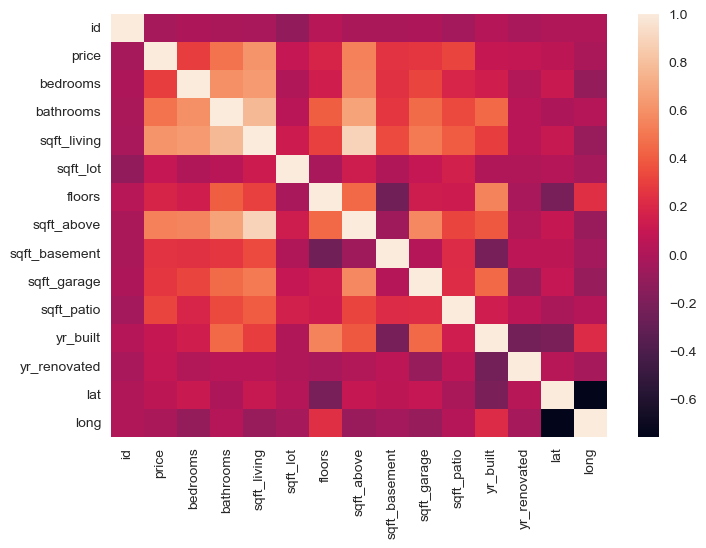

In [18]:
# heatmap of correlations
sns.heatmap(df.corr());

### Check for multicollinearity

In [19]:
# Find pairs of highly correlated independendent variables

corr_df = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))

corr_df.set_index(['pairs'], inplace = True)

#drop level columns
corr_df.drop(columns=['level_1', 'level_0'], inplace = True)

corr_df.columns = ['cc']

#df.drop_duplicates(inplace=True)

perfect_corrs = corr_df.cc == 1
corr_df[(corr_df.cc>.75) & (corr_df.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.883732
"(sqft_living, sqft_above)",0.883732
"(bathrooms, sqft_living)",0.772209
"(sqft_living, bathrooms)",0.772209
"(lat, long)",0.760532
"(long, lat)",0.760532


In [20]:
# verify no variables are perfectly correlated with a different variable
perfect_corrs[(perfect_corrs.values == True)]

pairs
(id, id)                          True
(price, price)                    True
(lat, lat)                        True
(yr_renovated, yr_renovated)      True
(yr_built, yr_built)              True
(sqft_patio, sqft_patio)          True
(sqft_garage, sqft_garage)        True
(sqft_basement, sqft_basement)    True
(floors, floors)                  True
(sqft_lot, sqft_lot)              True
(sqft_living, sqft_living)        True
(bathrooms, bathrooms)            True
(bedrooms, bedrooms)              True
(sqft_above, sqft_above)          True
(long, long)                      True
Name: cc, dtype: bool

Squarefoot of living room and Squarefoot above ground, not surprisingly, have a high correlation. Squarefoot of living room and number of bathrooms are also highly correlated. Because I am including Squarefoot of living room in my baseline model, I will not include Squarefoot above ground or number of bathrooms in the same module.

### Visualizations

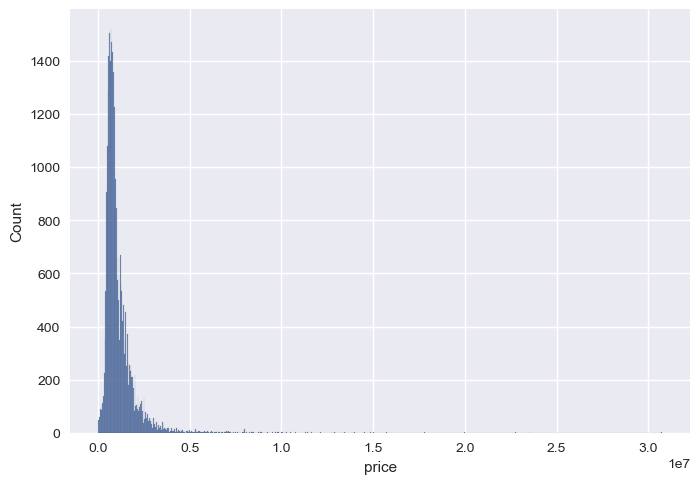

In [21]:
# distribution of price
sns.histplot(df['price'], bins='auto');

The distribution of price appears to have a positive skew, meaning that houses selling for very high prices are pulling the mean up. Also, a high level of kurtosis, indicating many outliers. 

In [22]:
plt.figure(figsize=(100, 100))
#sns.pairplot(df);

<Figure size 10000x10000 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

In [68]:
# prepare categorical variables for visualization
order_g = ['2 Substandard', '3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better', '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion']
order_c = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']


In [69]:
mapping_g = {grade: i for i, grade in enumerate(order_g)}
key_g = df['grade'].map(mapping_g)
mapping_c = {condition: i for i, condition in enumerate(order_c)}
key_c = df['condition'].map(mapping_c)

In [70]:
df = df.iloc[key_g.argsort()]
df_cond_order = df.copy()
df_cond_order.iloc[key_c.argsort()]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,city,log_price
30071,1122029143,6/18/2021,400000.0,1,1.0,760,148975,2.0,NO,NO,...,0,0,200,1983,0,"21103 131st Place Southwest, Vashon, Washingto...",47.415170,-122.505720,"Vashon,",12.899220
28960,4318200335,8/2/2021,589000.0,2,2.0,1430,7738,1.5,NO,NO,...,360,0,100,1912,0,"4103 Southwest Othello Street, Seattle, Washin...",47.537400,-122.384780,"Seattle,",13.286181
27179,7199200180,8/17/2021,780000.0,3,1.5,1500,7252,1.0,NO,NO,...,0,480,40,1969,0,"10201 162nd Avenue Northeast, Redmond, Washing...",47.691210,-122.124450,"Redmond,",13.567049
16372,8632100025,7/7/2021,710525.0,2,1.5,810,8420,1.0,NO,NO,...,810,300,0,1947,0,"13709 1st Avenue Northeast, Seattle, Washingto...",47.728950,-122.329190,"Seattle,",13.473759
28132,3423049209,3/31/2022,542000.0,3,1.0,970,9130,1.0,NO,NO,...,0,0,100,1957,0,"18435 Military Road South, SeaTac, Washington ...",47.436895,-122.271575,"SeaTac,",13.203021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10417,3275300220,9/25/2021,490000.0,3,2.5,1520,9650,1.0,NO,NO,...,1010,550,80,1983,0,"74 17th Avenue, Milton, Washington 98354, Unit...",47.259560,-122.312060,"Milton,",13.102161
22408,2919200595,12/21/2021,815000.0,4,2.0,1360,3840,1.5,NO,NO,...,890,0,0,1915,0,"128 Northwest 81st Street, Seattle, Washington...",47.687880,-122.359310,"Seattle,",13.610943
22407,2641800080,5/5/2022,415000.0,2,1.5,840,8569,1.0,NO,NO,...,580,0,0,1951,0,"159 Southwest 114th Street, Seattle, Washingto...",47.501110,-122.336200,"Seattle,",12.936034
4099,558100055,11/19/2021,500000.0,2,1.0,670,8160,1.0,NO,NO,...,0,0,410,1948,0,"14563 Ashworth Avenue North, Shoreline, Washin...",47.735980,-122.340000,"Shoreline,",13.122363


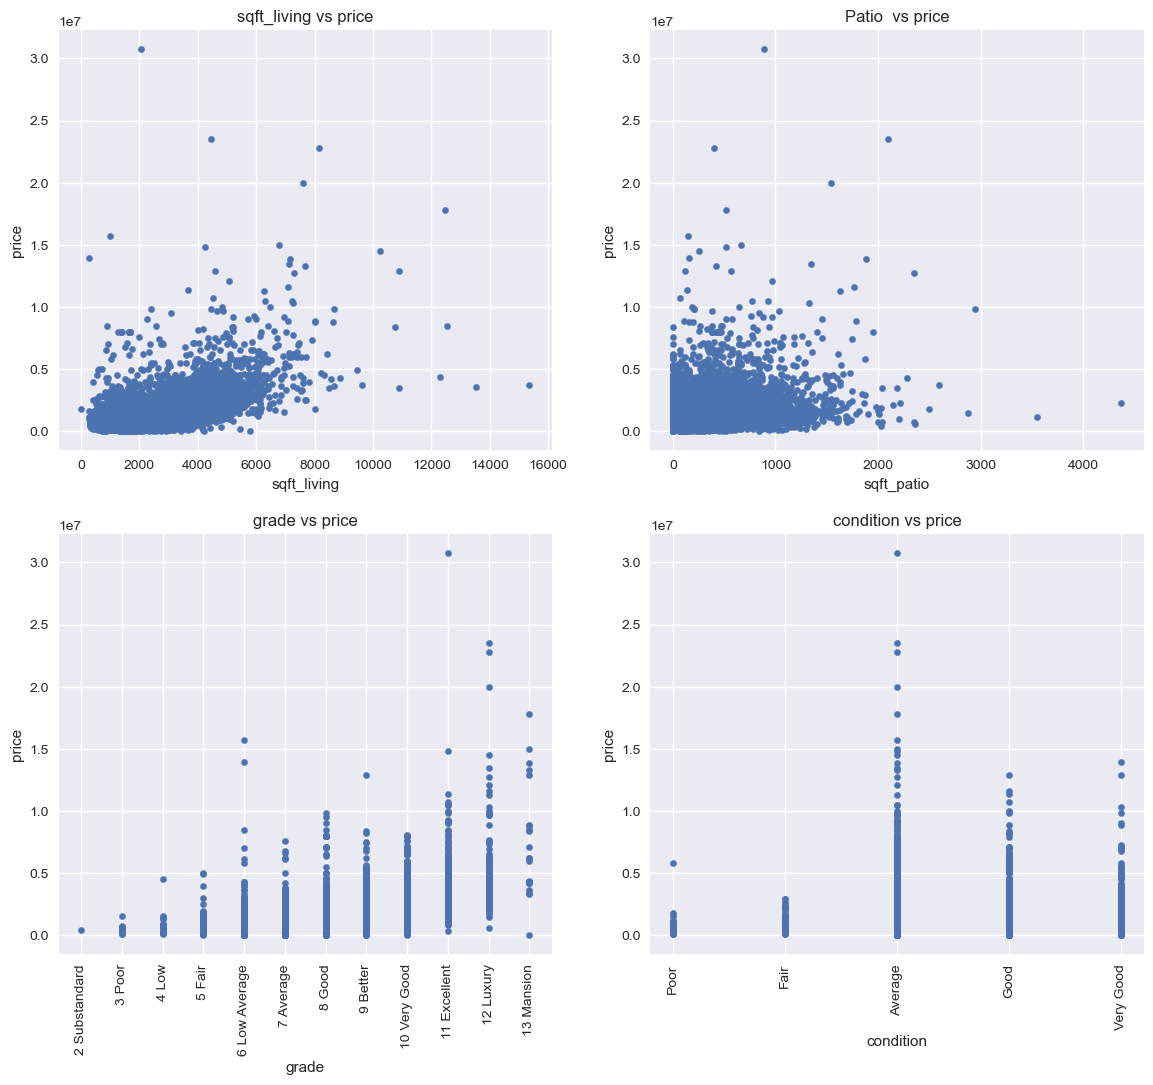

In [26]:
# scatter plot of variables which may have a high correlation

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,12))
df.plot.scatter(x="sqft_living", y="price", ax=axes[0][0]).set_title('sqft_living vs price')
df.plot.scatter(x="sqft_patio", y="price", ax=axes[0][1]).set_title('Patio  vs price')
df.plot.scatter(x="grade", y="price", ax=axes[1][0], rot=90).set_title('grade vs price')
df_cond_order.plot.scatter(x="condition", y="price", ax=axes[1][1], rot=90).set_title('condition vs price');


None of the relationships appear obviously linear. It is not difficult to make out a relationship between squarefoot lving room and price. 

# Modeling and Results

### Simple linear regression model with Living room squarefoot as predictor

In [27]:
y0 = df["price"]
X0_baseline = df[["sqft_living"]]

In [28]:
baseline_model0 = sm.OLS(y0, sm.add_constant(X0_baseline))
baseline_results0 = baseline_model0.fit()

print(baseline_results0.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.771e+04
Date:                Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                        06:47:03   Log-Likelihood:            -4.4845e+05
No. Observations:               30110   AIC:                         8.969e+05
Df Residuals:                   30108   BIC:                         8.969e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.554e+04   9798.938     -7.709      

### Interpretation:

 37% of the variation in sale price is explained by the model. The model is statistically significant overall, with an F-statistic p-value well below 0.05. Both the coeficient for living room square foot and the constant are significant. Each additional square foot of living room space adds $560 to the price. 



#### Visualize residuals

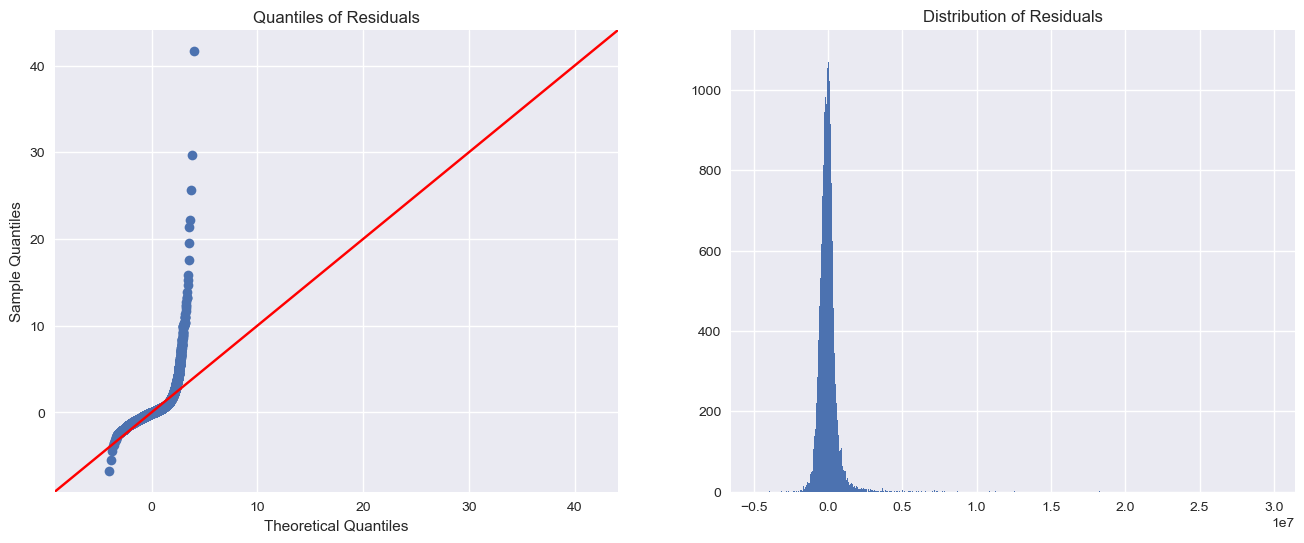

In [29]:
# plot residuals
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sm.graphics.qqplot(baseline_results0.resid, dist=stats.norm, line='45', fit=True, ax=ax1)
ax2.hist(baseline_results0.resid, bins="auto");
ax2.set_title("Distribution of Residuals");
ax1.set_title("Quantiles of Residuals");

The residuals do not follow a normal distribution. This violates an assumption of linnear regression. I will make transformations to the variables to find out if a better model can be produced. 

In [30]:
baseline0_mae = baseline_results0.resid.abs().sum() / len(y0)
baseline0_mae

396253.8351884112

The MAE is $396,253. The model could be off by that amount in either direction when predicting the value of a home. This seems rather large of an error, again indicating this model does not perform well.

### Remove outliers

In [31]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3-q1


# Removing upper bound and lower bound from price in kc DataFrame

df['price'] = df.loc[df['price'] < q3 + (1.5 * iqr), 'price']
df['price'] = df.loc[df['price'] > q1 - (1.5 * iqr), 'price']

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30110 entries, 30071 to 21111
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30110 non-null  int64  
 1   date           30110 non-null  object 
 2   price          28120 non-null  float64
 3   bedrooms       30110 non-null  int64  
 4   bathrooms      30110 non-null  float64
 5   sqft_living    30110 non-null  int64  
 6   sqft_lot       30110 non-null  int64  
 7   floors         30110 non-null  float64
 8   waterfront     30110 non-null  object 
 9   greenbelt      30110 non-null  object 
 10  nuisance       30110 non-null  object 
 11  view           30110 non-null  object 
 12  condition      30110 non-null  object 
 13  grade          30110 non-null  object 
 14  heat_source    30110 non-null  object 
 15  sewer_system   30110 non-null  object 
 16  sqft_above     30110 non-null  int64  
 17  sqft_basement  30110 non-null  int64  
 18  sq

In [33]:
df.isnull().sum()

id                  0
date                0
price            1990
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
greenbelt           0
nuisance            0
view                0
condition           0
grade               0
heat_source         0
sewer_system        0
sqft_above          0
sqft_basement       0
sqft_garage         0
sqft_patio          0
yr_built            0
yr_renovated        0
address             0
lat                 0
long                0
city                0
dtype: int64

In [34]:
df.dropna(inplace=True)

In [35]:
df['price'].describe()

count    2.812000e+04
mean     9.419833e+05
std      4.347023e+05
min      2.736000e+04
25%      6.300000e+05
50%      8.299925e+05
75%      1.199950e+06
max      2.275182e+06
Name: price, dtype: float64

#### Examine model with outliers removed

In [36]:
y = df["price"]
X_baseline = df[["sqft_living"]]

baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                 1.317e+04
Date:                Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                        06:47:09   Log-Likelihood:            -3.9956e+05
No. Observations:               28120   AIC:                         7.991e+05
Df Residuals:                   28118   BIC:                         7.991e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.308e+05   5738.592     57.648      

### Interpretation:

 32% of the variation in sale price is explained by the model. The model is statistically significant overall, with an F-statistic p-value well below 0.05. Both the coeficient for living room square foot and the constant are significant. Each additional square foot of living room space adds $307 to the price. 



#### Visualize residuals

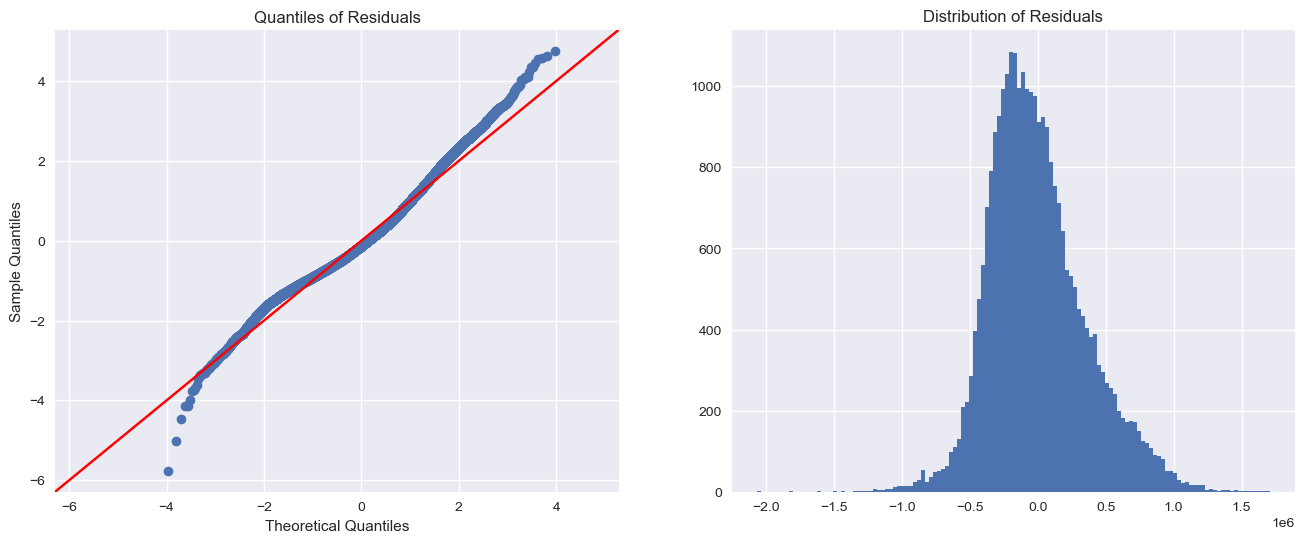

In [37]:
# plot residuals
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sm.graphics.qqplot(baseline_results.resid, dist=stats.norm, line='45', fit=True, ax=ax1)
ax2.hist(baseline_results.resid, bins="auto");
ax2.set_title("Distribution of Residuals");
ax1.set_title("Quantiles of Residuals");

While this model has a lower r squared, the distribution of the residuals is much better. 

In [38]:
baseline_mae = baseline_results.resid.abs().sum() / len(y)
baseline_mae

279686.3928750523

The MAE is $279,686. This is much better than the above module, but still seems like a large error.

### Investigate taking the Log of price
The distribution of price was very skewed, I will examine taking the logarithm.  

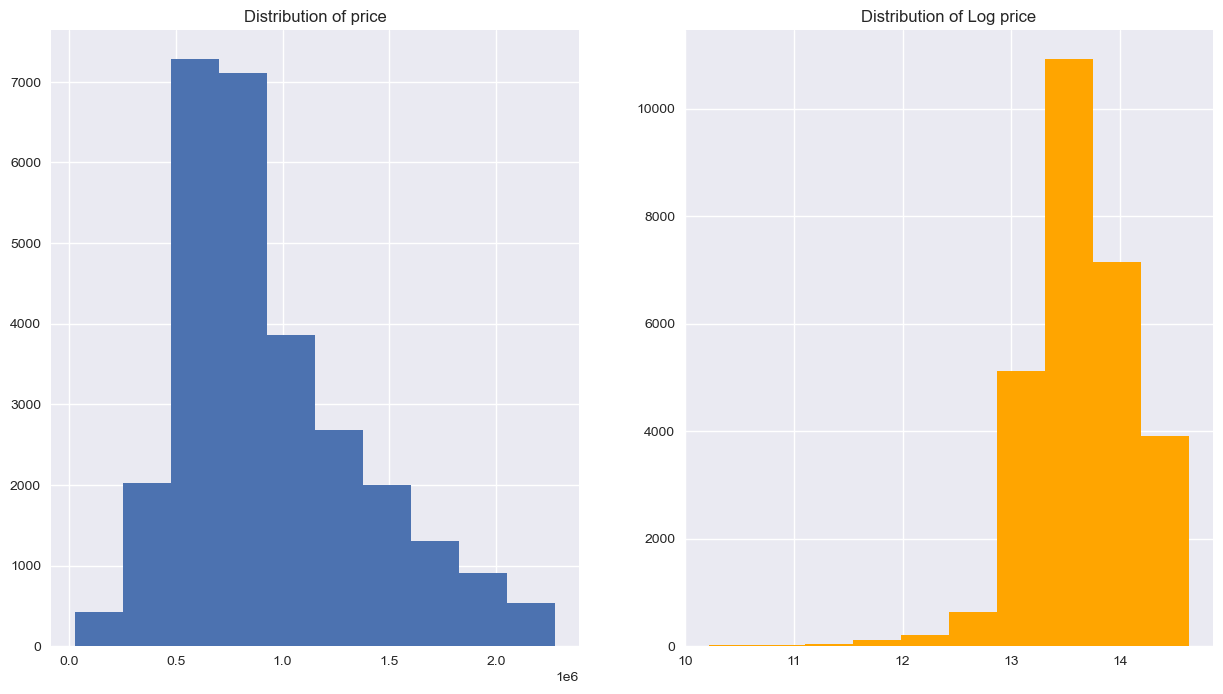

In [39]:
# plot distributions of price and log price
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,8))
ax1.hist(df['price'], label="price")
ax2.hist(np.log(df['price']), color="orange", label="log(price)")
ax1.set_title("Distribution of price");
ax2.set_title("Distribution of Log price");

Taking the Logarithm of price appears to make the distribution more normal. I will look at a model with a log transformed price.

In [40]:
#add log price to the dataframe
df['log_price'] = np.log(df['price'])
df_cond_order['log_price'] = np.log(df['price'])


In [41]:
y_log = df['log_price']

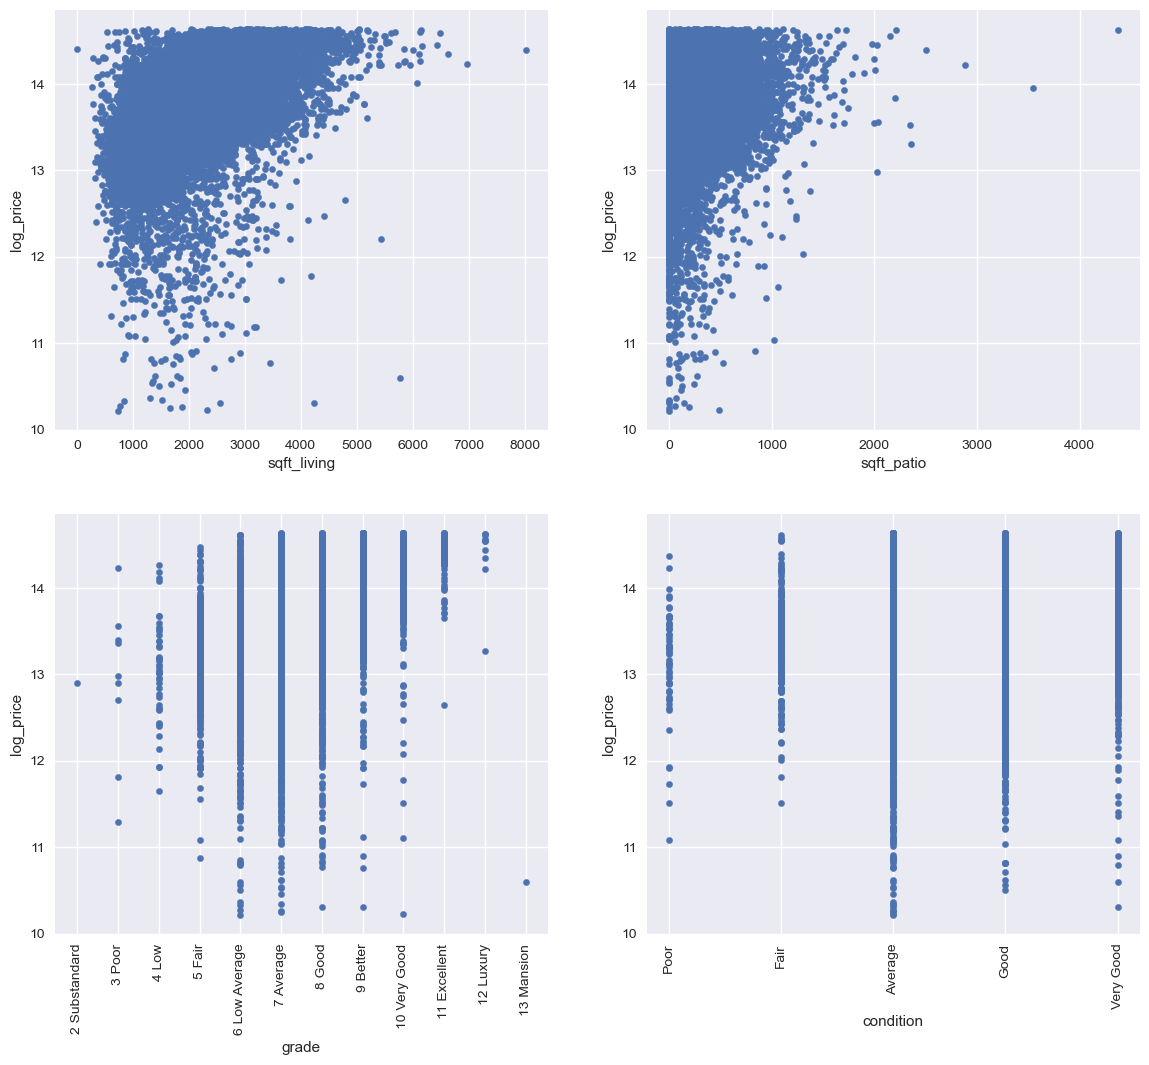

In [42]:
# plot with log price on the y-axis
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,12))
df.plot.scatter(x="sqft_living", y="log_price", ax=axes[0][0])
df.plot.scatter(x="sqft_patio", y="log_price", ax=axes[0][1])
df.plot.scatter(x="grade", y="log_price", ax=axes[1][0], rot=90)
df_cond_order.plot.scatter(x="condition", y="log_price", ax=axes[1][1], rot=90);
#fig.tight_layout();               

### Simple linear regression model with log tranformed target variable

In [43]:
baseline_log_y_model = sm.OLS(y_log, sm.add_constant(X_baseline))
baseline_log_y_results = baseline_log_y_model.fit()

print(baseline_log_y_results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     9990.
Date:                Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                        06:47:13   Log-Likelihood:                -15351.
No. Observations:               28120   AIC:                         3.071e+04
Df Residuals:                   28118   BIC:                         3.072e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.0276      0.007   1949.688      

### Interpretation:
26% of the variation in sale price is explained by this model. It is statistically significant overall, with an F-statistic p-value well below 0.05. Both the coeficient for living room square foot and the constant are significant. Each additional square foot of living room space adds .03\% increase in price.


#### Visualize residuals

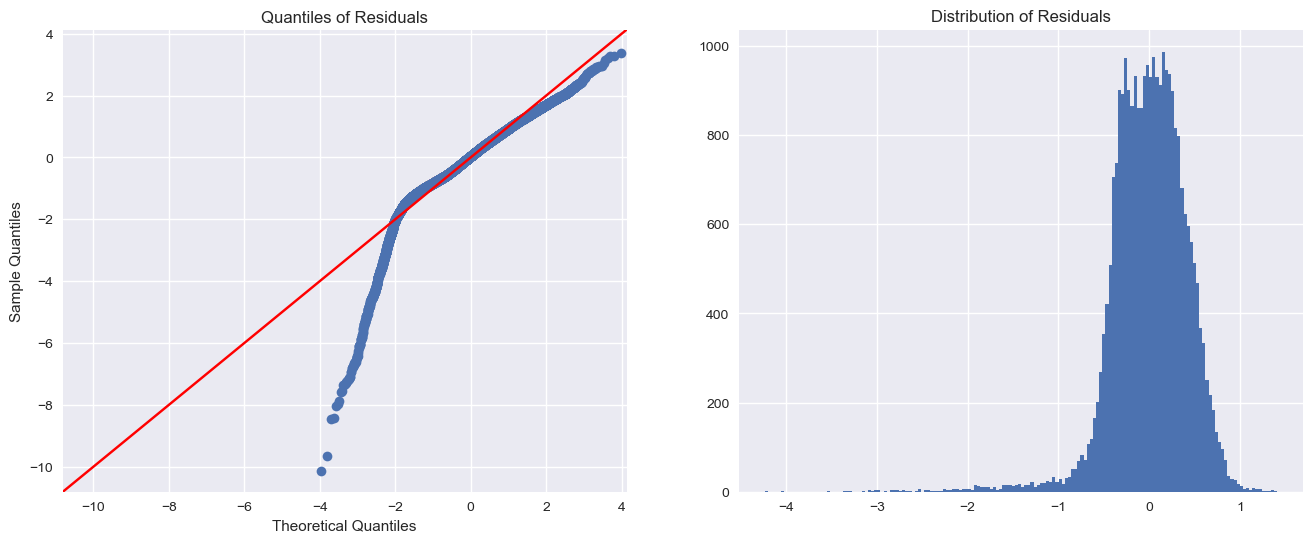

In [44]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sm.graphics.qqplot(baseline_log_y_results.resid, dist=stats.norm, line='45', fit=True, ax=ax1)
ax2.hist(baseline_log_y_results.resid, bins="auto");
ax2.set_title("Distribution of Residuals");
ax1.set_title("Quantiles of Residuals");

The distribution of the residuals are closer to normal, but not as close as I'd like. 

In [45]:
baseline_log_y_results_mae = baseline_log_y_results.resid.abs().sum() / len(y_log)
baseline_log_y_results_mae

0.3113772698774919

MAE of 33.5, this means that the model could be off by that amount in either direction. Ideally, I would like the model to be more accurate. Next I will investigate transforming the independent variable.

### Log transform the independent variable as well

In [46]:
X_log = np.log(df['sqft_living'])

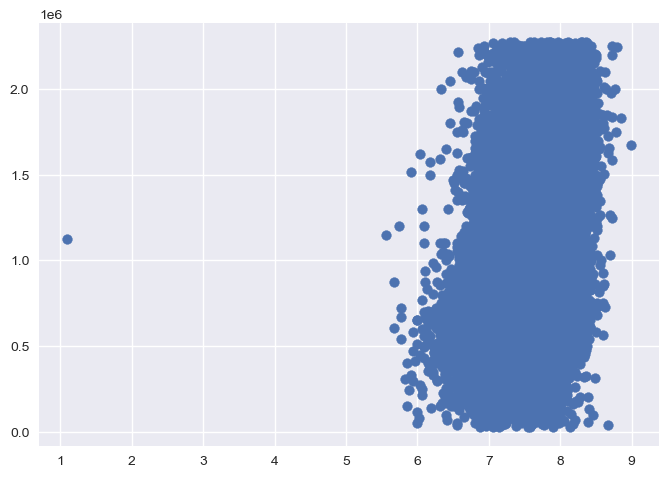

In [71]:
plt.scatter(x=X_log, y=df['price'])


In [72]:
baseline_log_x_model = sm.OLS(y, sm.add_constant(X_log))
baseline_log_x_results = baseline_log_x_model.fit()

print(baseline_log_x_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                 1.161e+04
Date:                Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                        08:25:42   Log-Likelihood:            -4.0011e+05
No. Observations:               28120   AIC:                         8.002e+05
Df Residuals:                   28118   BIC:                         8.002e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.361e+06      4e+04    -84.032      

### Interpretation:
29% of the variation in sale price is explained by the model, a drop compared with just the log transformed target variable model. Both the coeficient for living room square foot and the constant are significant. EThe model is statistically significant overall, with an F-statistic p-value well below 0.05. For each increase of 1% living room square foot there is a 77% increase in price. Better than the log transformed target but not as good as original.
  


#### Visualize residuals

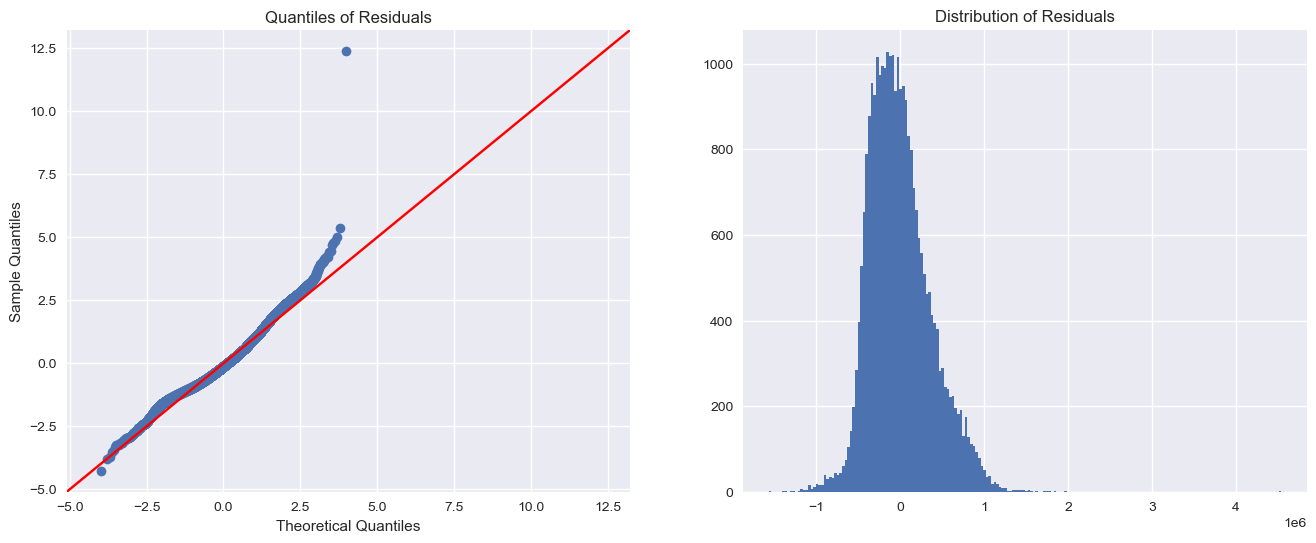

In [73]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sm.graphics.qqplot(baseline_log_x_results.resid, dist=stats.norm, line='45', fit=True, ax=ax1)
ax2.hist(baseline_log_x_results.resid, bins="auto");
ax2.set_title("Distribution of Residuals");
ax1.set_title("Quantiles of Residuals");

There appears to be one extreme outlier.

In [74]:
baseline_logx_results_mae = baseline_log_x_results.resid.abs().sum() / len(y)
baseline_logx_results_mae

287225.28241118847

With a MAE of $287,225, this model has a larger error than the untransformed model.

#### Visualize categorical columns

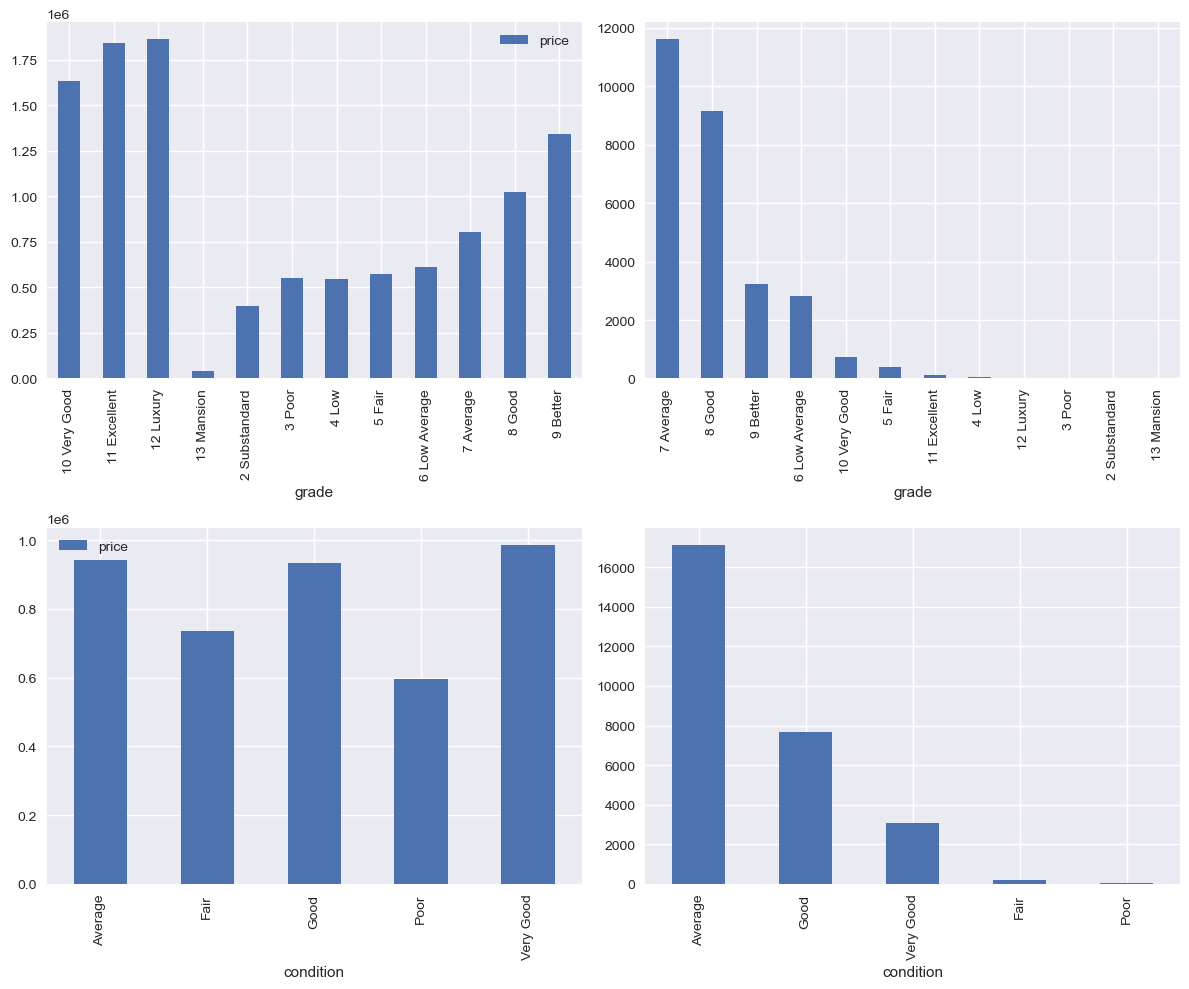

In [51]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
for i, col in enumerate(["condition", "grade"]):
     df.groupby(col).mean().plot.bar(y="price", ax=axes[i-1][0])
     df[col].value_counts().plot.bar(ax=axes[i-1][1]).set_xlabel(col)
plt.tight_layout()

### Add grades to the baseline model with the target variable log transformed

https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#g 

Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value. 
Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

In [52]:
# create dummy variables, and drop the average
df2 = df.copy()
df2 = pd.get_dummies(df2, columns=["grade"]) 
df2.drop('grade_7 Average', axis=1, inplace=True)
df2.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long', 'city', 'log_price',
       'grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_2 Substandard', 'grade_3 Poor',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_8 Good',
       'grade_9 Better'],
      dtype='object')

In [53]:
X0 = df2[['sqft_living',
       'grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_2 Substandard', 'grade_3 Poor',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_8 Good',
       'grade_9 Better']]

In [54]:
model0 = sm.OLS(y_log, sm.add_constant(X0))
model0_results = model0.fit()

print(model0_results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     1119.
Date:                Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                        06:47:20   Log-Likelihood:                -14133.
No. Observations:               28120   AIC:                         2.829e+04
Df Residuals:                   28107   BIC:                         2.840e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  13.1848    

### Interpretation:
45% of the variation in sale price is explained by the model. Both the coeficient and intercept are significant. A grade of 'Average' is the reference variable, meaning the coefficients for other grades are in relation to an 'average' grade house.

Grade 2, 'substandard' is the only grade with a coefficient not significant. 
As could be expected, grades below average have a negative coefficient, indicating that house value decreases with a lower quality grade. For example, those with a grade of 'Poor' have a 40% decrease in value compared to an average house.

Housing prices increase with each grade above average, except for 'Mansion'. Houses with a grade of 'Luxury' sell for 85% more than an average grade house.

For each increase of squarefoot living room, there is an associated .02/% increase price. 



#### Visualize residuals

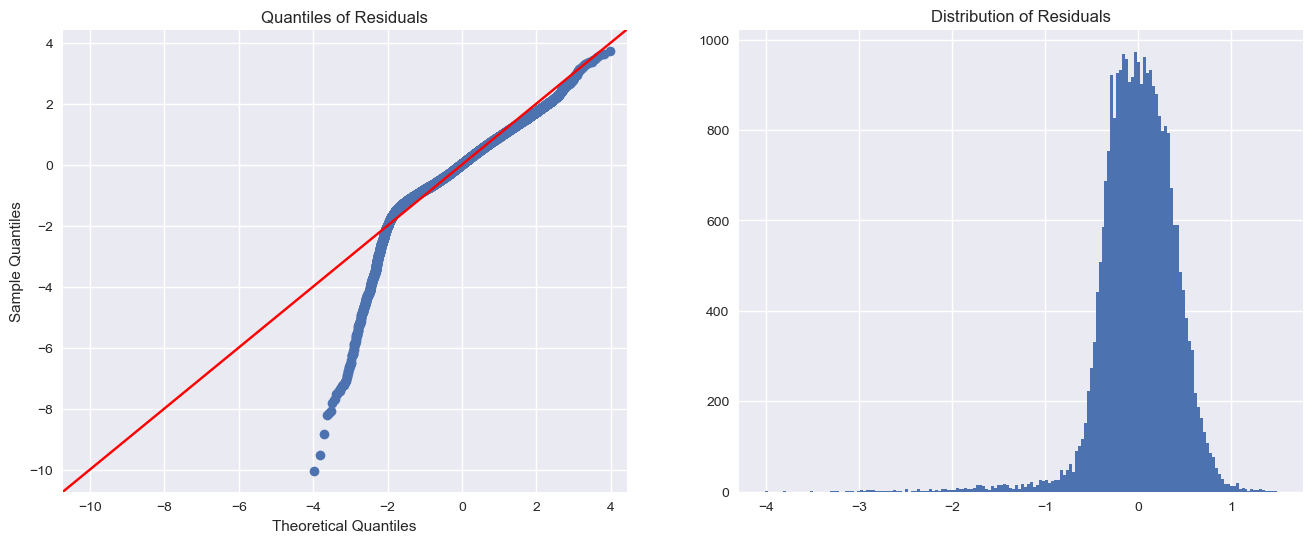

In [55]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sm.graphics.qqplot(model0_results.resid, dist=stats.norm, line='45', fit=True, ax=ax1)
ax2.hist(model0_results.resid, bins="auto");
ax2.set_title("Distribution of Residuals");
ax1.set_title("Quantiles of Residuals");

In [56]:
model0_mae = model0_results.resid.abs().sum() / len(y)
model0_mae

0.2946148833535004

With a MAE of 31.5, this means that on average, the model could be off by that amount in either direction. This still seems like a large error.

### Add condition to the model, with target variable still log transformed

In [57]:
df2 = pd.get_dummies(df2, columns=["condition"]) #, drop_first=True
df2.drop('condition_Average', axis=1, inplace=True)
df2.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'address',
       'lat', 'long', 'city', 'log_price', 'grade_10 Very Good',
       'grade_11 Excellent', 'grade_12 Luxury', 'grade_13 Mansion',
       'grade_2 Substandard', 'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair',
       'grade_6 Low Average', 'grade_8 Good', 'grade_9 Better',
       'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very Good'],
      dtype='object')

In [58]:
X1 = df2[['sqft_living',
       'grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_2 Substandard', 'grade_3 Poor',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_8 Good',
       'grade_9 Better', 'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very Good', 'bathrooms']]

In [59]:
model1 = sm.OLS(y_log, sm.add_constant(X1))
model1_results = model1.fit()

print(model1_results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     833.4
Date:                Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                        06:47:22   Log-Likelihood:                -13885.
No. Observations:               28120   AIC:                         2.781e+04
Df Residuals:                   28102   BIC:                         2.795e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  13.1424    

### Interpretation:
45.6% of the variation in sale price is explained by the model, only a very slight increase from the previous model. Both the coeficient and intercept are significant. A grade of 'Average' and average condition are the reference variables, meaning the coefficients for other grades are in relation to an 'average' grade house and one of average condition.

Grade 2, 'substandard', again,  is the only grade with a coefficient not significant. 
As could be expected, grades below average have a negative coefficient, indicating that house value decreases with a lower quality grade. For example, those with a grade of 'Poor' have a 30% decrease in value compared to an average house.

Housing prices increase with each grade above average, except for 'Mansion'. Houses with a grade of 'Luxury' now sell for 90% more than an average grade house.

For each increase of squarefoot living room, there is still an associated .02/% increase price. 



#### Visualize residuals

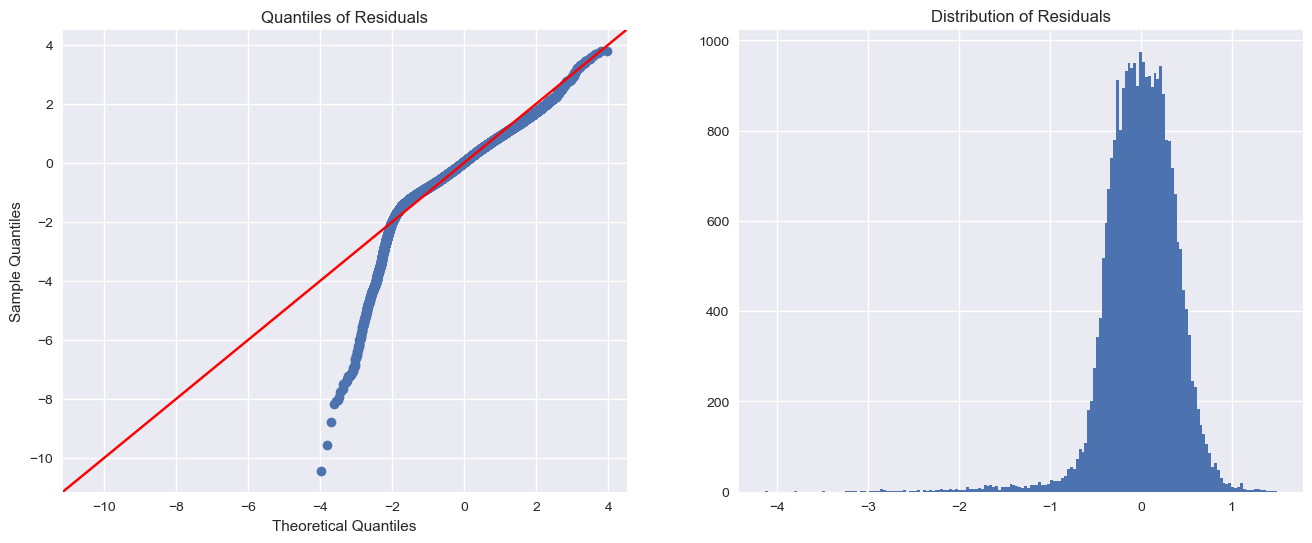

In [60]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sm.graphics.qqplot(model1_results.resid, dist=stats.norm, line='45', fit=True, ax=ax1)
ax2.hist(model1_results.resid, bins="auto");
ax2.set_title("Distribution of Residuals");
ax1.set_title("Quantiles of Residuals");

In [61]:
model1_mae = model1_results.resid.abs().sum() / len(y)
model1_mae

0.29158696017091174

With a MAE of 30.9, this means that on average, the model could be off by that amount in either direction. Only slightly better than the previous.

### Add Patio sqft to the model

In [62]:
X2 = df2[['sqft_living', 
       'grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_2 Substandard', 'grade_3 Poor',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_8 Good',
       'grade_9 Better', 'sqft_patio']]

model2 = sm.OLS(y_log, sm.add_constant(X2))
model2_results = model2.fit()

print(model2_results.summary())


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     1039.
Date:                Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                        06:47:24   Log-Likelihood:                -14106.
No. Observations:               28120   AIC:                         2.824e+04
Df Residuals:                   28106   BIC:                         2.835e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  13.1815    

### Interpretation:
45% of the variation in sale price is explained by the model. Both the coeficient and intercept are significant. A grade of 'Average' is the reference variable, meaning the coefficients for other grades are in relation to an 'average' grade house.
The coefficients for grade are similar to the model without patio size.

For each increase of squarefoot living room, there is an associated .02/% increase price. For each increase of squarefoot patio, .01/% increase price.

This model is hardly any better than the one without patio size.

#### Visualize residuals

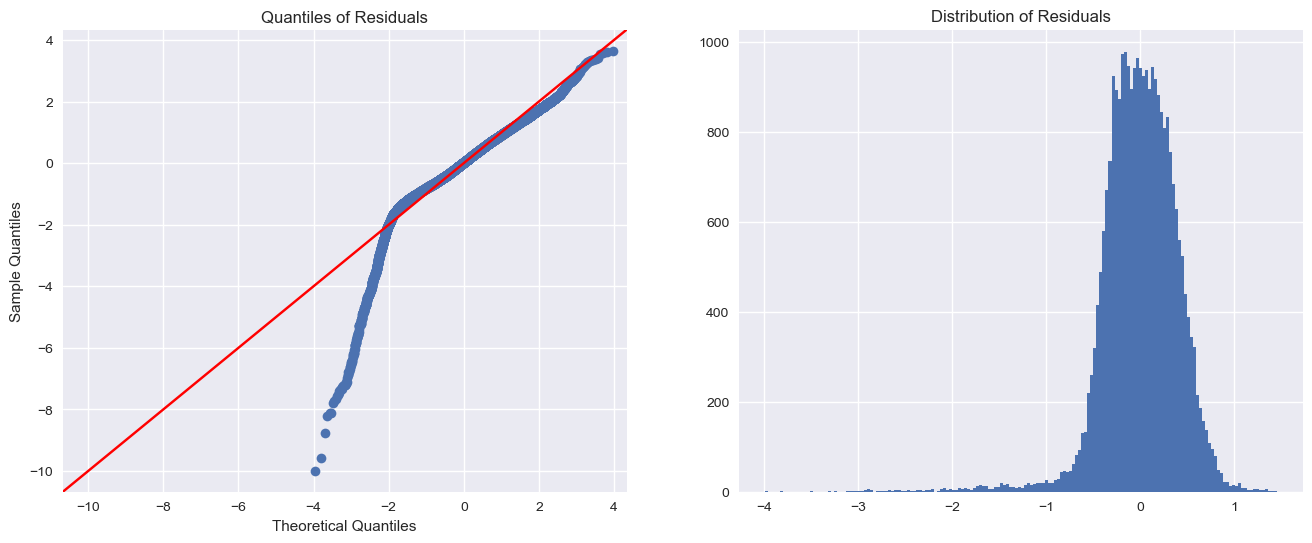

In [63]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sm.graphics.qqplot(model2_results.resid, dist=stats.norm, line='45', fit=True, ax=ax1)
ax2.hist(model2_results.resid, bins="auto");
ax2.set_title("Distribution of Residuals");
ax1.set_title("Quantiles of Residuals");

In [64]:
model2_mae = model2_results.resid.abs().sum() / len(y)
model2_mae

0.2943959801044654

With a MAE of 31.2, higher than previous model.

### Does a model with many independent variables seem any better?

In [65]:
X3 = df2[['sqft_living', 
       'grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_2 Substandard', 'grade_3 Poor',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_8 Good',
       'grade_9 Better', 'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very Good', 'bathrooms', 'floors', 'sqft_patio', 'bedrooms']]

model3 = sm.OLS(y_log, sm.add_constant(X3))
model3_results = model3.fit()

print(model3_results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     713.1
Date:                Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                        06:47:26   Log-Likelihood:                -13853.
No. Observations:               28120   AIC:                         2.775e+04
Df Residuals:                   28099   BIC:                         2.792e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  13.1912    

### Interpretation:
 46% of the variation in sale price is explained by the model. Both the coeficient and intercept are significant. There is not a tremendous change in the coefficients of living room size, grade, or condition. Each additional bathroom adds 2.8% increase to the price. However, there is a high correlation between bathrooms and living room size. This is hardly any better than the model with just Squarefoot living room and grade, and this model includes highly correlated variables. 


#### Visualize residuals

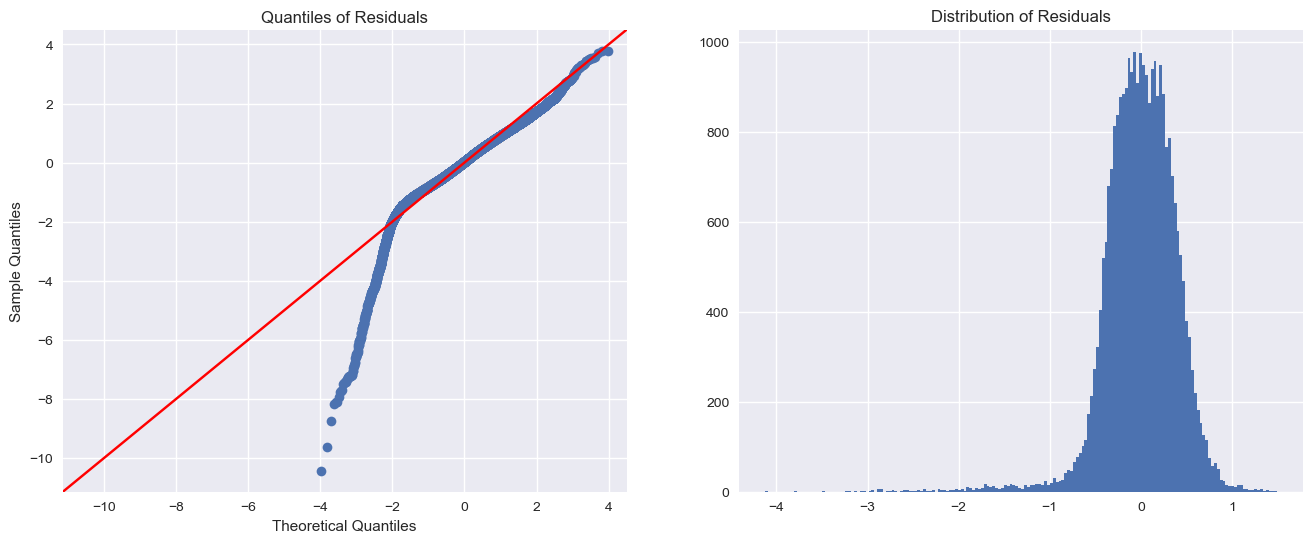

In [66]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sm.graphics.qqplot(model3_results.resid, dist=stats.norm, line='45', fit=True, ax=ax1)
ax2.hist(model3_results.resid, bins="auto");
ax2.set_title("Distribution of Residuals");
ax1.set_title("Quantiles of Residuals");

In [67]:
model3_mae = model3_results.resid.abs().sum() / len(y)
model3_mae

0.2909326768333028

A similar MAE compared with other models. 

# Conclusions

Based on the results of the analysis, my recommendations are to:

Where possible, enlarge the living room. 

Use high quality materials in the remodel and make the house look as nice as possible.

# Next steps